In [1]:
# IBM HR Employee Churn Prediction

import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.cross_validation import StratifiedKFold
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
matplotlib.style.use('ggplot')
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading Data

df1=pd.read_csv(r'C:\Users\HP\Desktop\Employee Churn\WA_Fn-UseC_-HR-Employee-Attrition.csv','r',encoding='utf8',delimiter=',')


print(df1.shape)
print()
df1.head()

(1470, 35)



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Checking for Missing values

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
# Statistical Summary

df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# Percentage of Attrition rate in the dataset

df1['Attrition'].value_counts()/df1.shape[0]*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [6]:
# Number of unique values per column.

Nunique = df1.nunique()
Nunique = Nunique.sort_values()
Nunique

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [7]:
df1.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# Delete attributes with single unique value

Single_Unique=['Over18','StandardHours','EmployeeCount']

for col in Single_Unique:
    del df1[col]

df1.shape

(1470, 32)

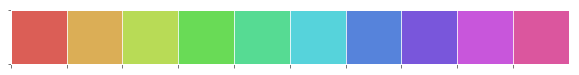

In [9]:
sns.palplot(sns.color_palette("hls", 10))
plt.show() 

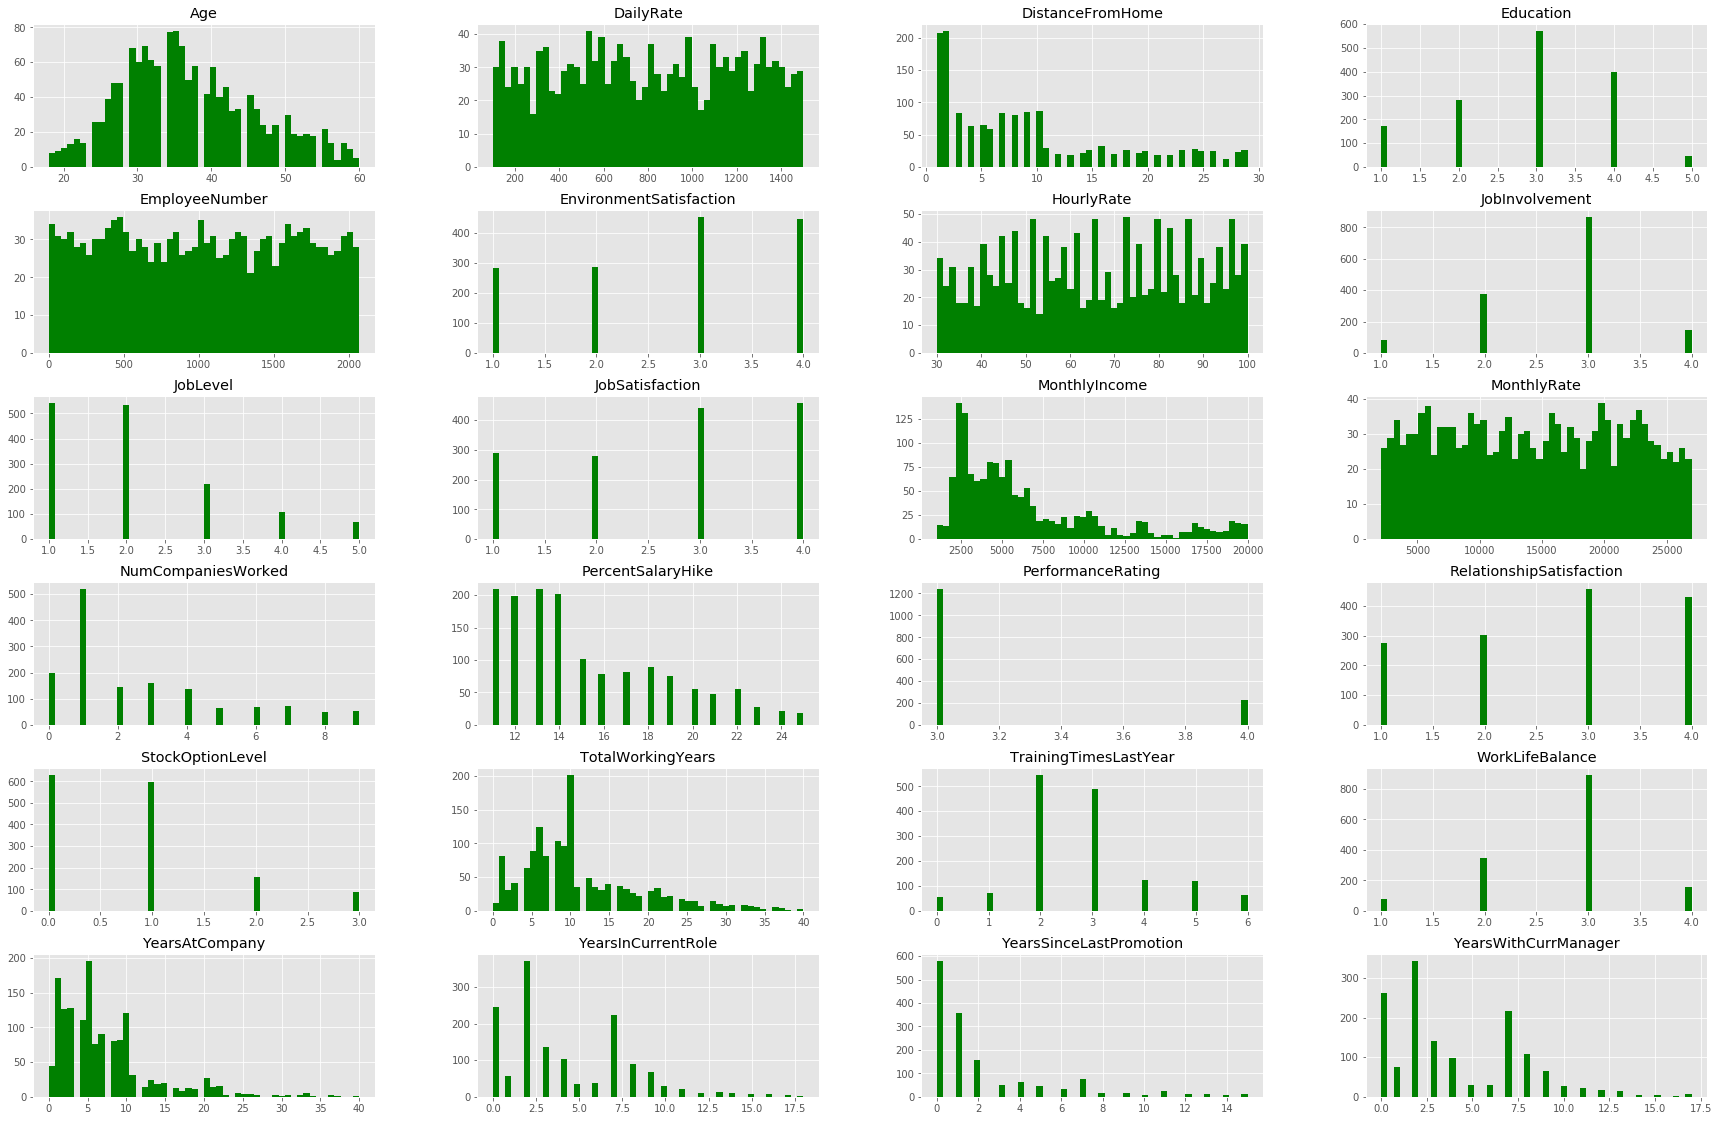

In [10]:
%matplotlib inline
#%pylab inline
import matplotlib.pyplot as plt
hists = df1.hist(bins=50,figsize=(30, 30),layout=(9,4),color='green')

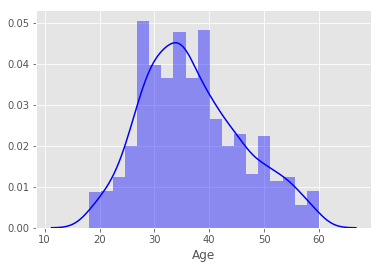

In [11]:
# Distribution plot for Age

sns.distplot(df1['Age'],color='blue')
plt.show()

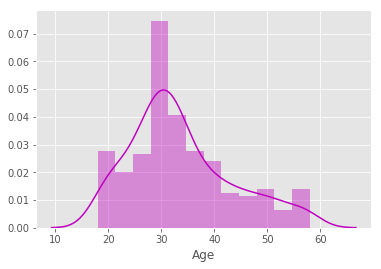

In [12]:
#sns.factorplot(x="Gender", y="Age", col="Attrition", data=df1,type='count')

# Distribution plot for Age


sns.distplot(df1[df1['Attrition']=='Yes']['Age'],color='m')
plt.show()

# Attrition peaks for employees aged 30
   

In [13]:
# Converting Age to Categorical Variable 

df1['Cat_Age'] = pd.cut(df1['Age'], bins=4, labels=['Young', 'Middle', 'Senior','Super Senior'])

df1['Cat_Age'].head()


0    Senior
1    Senior
2    Middle
3    Middle
4     Young
Name: Cat_Age, dtype: category
Categories (4, object): [Young < Middle < Senior < Super Senior]

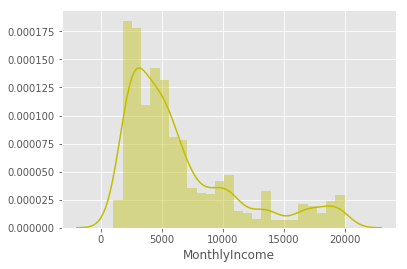

In [14]:
# Distribution plot for Salary

sns.distplot(df1['MonthlyIncome'],color='y',bins=25)
plt.show()

In [15]:
df1['Cat_MonthlyIncome'] = pd.cut(df1['MonthlyIncome'], bins=4, labels=['Low', 'Moderate', 'High','Very High'])

df1['Cat_MonthlyIncome'].head()

0    Moderate
1         Low
2         Low
3         Low
4         Low
Name: Cat_MonthlyIncome, dtype: category
Categories (4, object): [Low < Moderate < High < Very High]

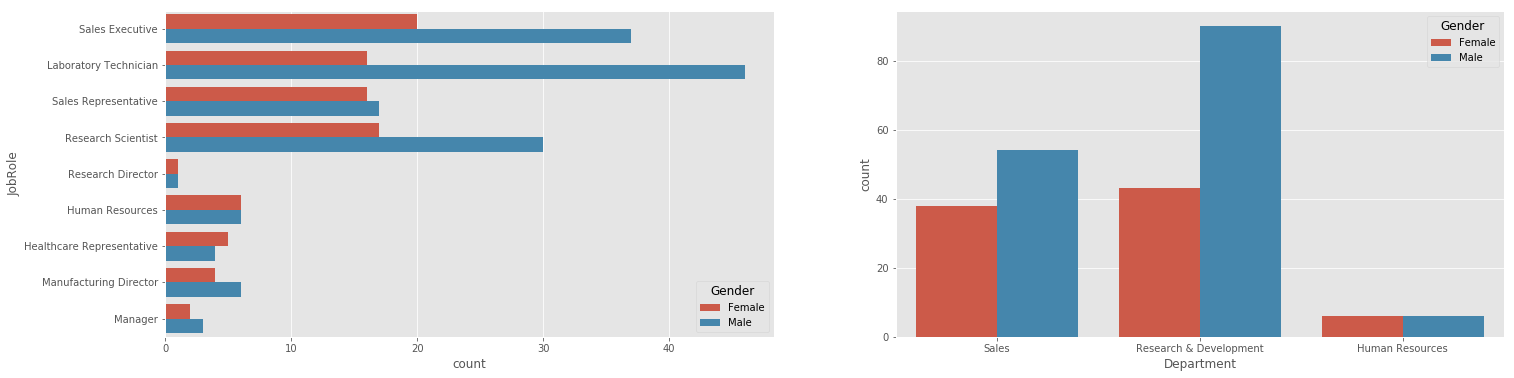

'\nAttrition is higher in Sales and R&D Departments(Lab Technicican and Research scientist)\nAttrition is lower in Managers and Director roles\n\n'

In [16]:
#Attrition across Job Roles
fig, ax6 = plt.subplots(1,2, figsize=(24,6))
sns.countplot(x='Department', hue='Gender', data = df1[df1['Attrition']=='Yes'], ax = ax6[1])
sns.countplot(y='JobRole', hue='Gender', data = df1[df1['Attrition']=='Yes'], ax = ax6[0])
plt.show()

'''
Attrition is higher in Sales and R&D Departments(Lab Technicican and Research scientist)
Attrition is lower in Managers and Director roles

'''

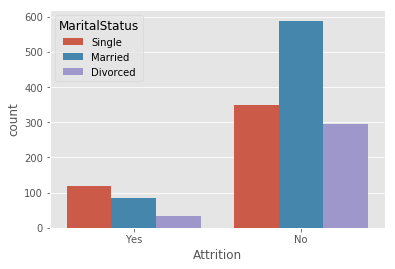

In [17]:
sns.countplot(x='Attrition', hue='MaritalStatus', data=df1)
plt.show()

# Attrition is higher in employees who are single.

In [18]:
df1['CmpYrInterval'] = pd.cut(df1['YearsAtCompany'], 5, labels=['<9', '<15', '<24', '<32', '<33+'])
df1['RateLvl'] = pd.cut(df1['DailyRate'], 5, labels=['lvl1', 'lvl2', 'lvl3', 'lvl4', 'lvl5'])
df1['PromoYrLvl'] = pd.cut(df1['YearsSinceLastPromotion'], 5, labels=['0to3', '3to6', '6to9', '9to12', '12+'])

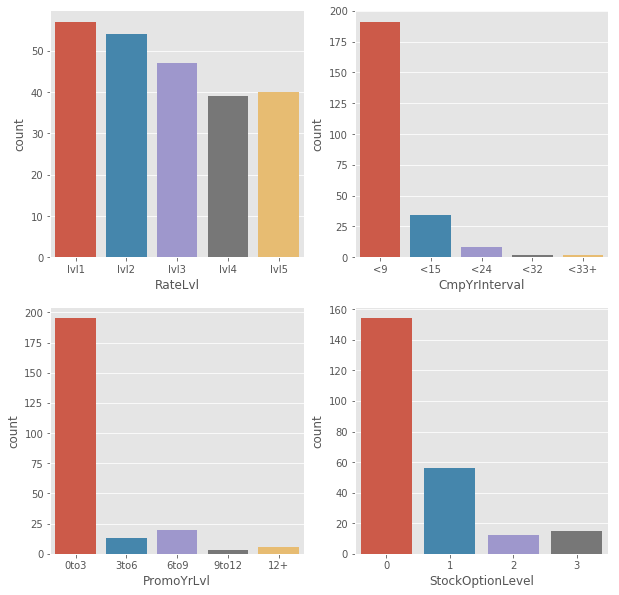

'\nAttrition seems to be higher in the lower earning level\nAttrition seems to be more within employees who are associated with lesser number of years\nAttrition is high even for employees promoted in the past 3 years, hence this not be a factor\nAttrition seems to be higher with employees who do not have stock options\n\n'

In [19]:
# Attrition count across Daily Rate, Years in company, Years since last promotion and level of stock options
fig, ax2 = plt.subplots(2,2, figsize=(10,10))
sns.countplot(x='RateLvl', data=df1[df1['Attrition']=='Yes'], ax = ax2[0,0])
sns.countplot(x='CmpYrInterval', data=df1[df1['Attrition']=='Yes'], ax = ax2[0,1])
sns.countplot(x='PromoYrLvl', data=df1[df1['Attrition']=='Yes'], ax = ax2[1,0])
sns.countplot(x='StockOptionLevel', data=df1[df1['Attrition']=='Yes'], ax = ax2[1,1])
plt.show()

'''
Attrition seems to be higher in the lower earning level
Attrition seems to be more within employees who are associated with lesser number of years
Attrition is high even for employees promoted in the past 3 years, hence this not be a factor
Attrition seems to be higher with employees who do not have stock options

'''

In [20]:
# Convert Numeric to Categoric Variables

df1['Cat_Education'] = pd.cut(df1['Education'], 5, labels=['Below College','College','Bachelor','Master','Doctor'])
df1['Cat_EnvironmentSatisfaction'] = pd.cut(df1['EnvironmentSatisfaction'], 4, labels=['Low','Medium','High','Very High'])
df1['Cat_JobInvolvement'] = pd.cut(df1['JobInvolvement'], 4, labels=['Low','Medium','High','Very High'])
df1['Cat_JobSatisfaction'] = pd.cut(df1['JobSatisfaction'], 4, labels=['Low','Medium','High','Very High'])
df1['Cat_PerformanceRating'] = pd.cut(df1['PerformanceRating'], 4, labels=['Low','Good','Excellent','Outstanding'])
df1['Cat_RelationshipSatisfaction'] = pd.cut(df1['RelationshipSatisfaction'], 4, labels=['Low','Medium','High','Very High'])
df1['Cat_WorkLifeBalance'] = pd.cut(df1['WorkLifeBalance'], 4, labels=['Bad','Good','Better','Best'])





In [21]:
d={'Yes':1,'No':0}

df1['Num_Attrition']=df1['Attrition'].map(d)

df1['Num_Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Num_Attrition, dtype: int64

   Cat_Education  Num_Attrition
0  Below College       0.182353
1        College       0.156028
2       Bachelor       0.173077
3         Master       0.145729
4         Doctor       0.104167


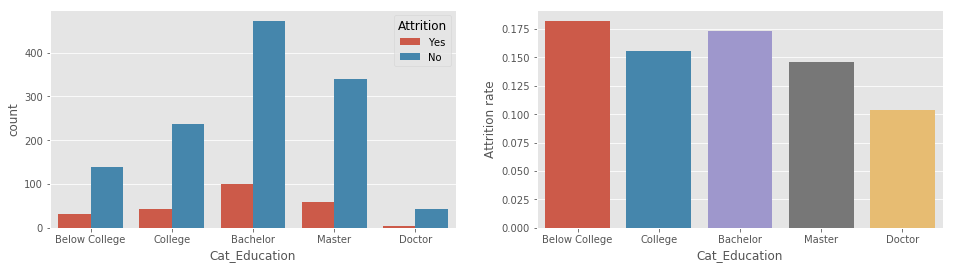

In [22]:
fig, ax1 = plt.subplots(1,2, figsize=(16,4))

sns.countplot(x='Cat_Education', hue = 'Attrition', data = df1,ax=ax1[0])


attrition_perc = df1[["Cat_Education", "Num_Attrition"]].groupby(['Cat_Education'], as_index = False).mean()
sns.barplot(x='Cat_Education', y = 'Num_Attrition', data= attrition_perc).set(ylabel='Attrition rate')

print(attrition_perc)

# Attrition Rate is maximum for Below College and minimum for Doctors.

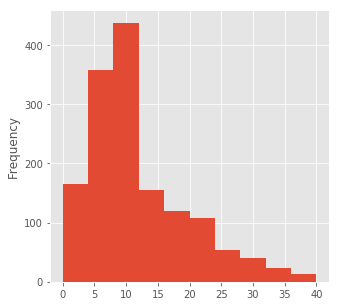

In [23]:
df1.TotalWorkingYears.plot(kind = 'hist',bins = 10,figsize = (5,5))

# Most of the Employees are working for 7.5 to 12.5 Years in the company.


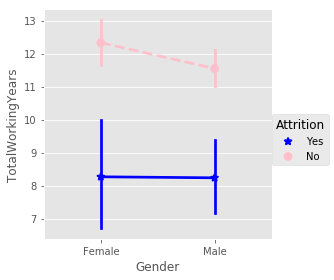

In [24]:
sns.factorplot(x="Gender", y="TotalWorkingYears", hue="Attrition", data=df1,
              palette={"Yes": "blue", "No": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);


# Males and Females within the ranges for 'TotalWorkingYears' of 11 to 13 are less likely to quit


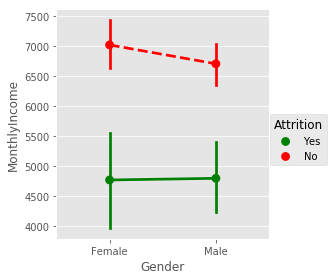

In [25]:
sns.factorplot(x="Gender", y="MonthlyIncome", hue="Attrition", data=df1,
              palette={"Yes": "green", "No": "red"},
              linestyles=["-", "--"]);
# Please with higher salary are less likely to leave the company.

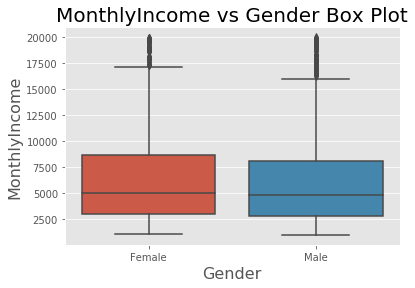

In [26]:
sns.boxplot(df1['Gender'], df1['MonthlyIncome'])
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)      
plt.ylabel('MonthlyIncome', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.show()

# Average and range of salary is higher in Female compared to Male associates

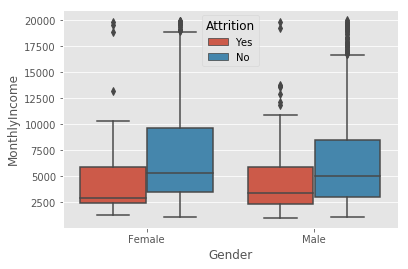

In [27]:
sns.boxplot(x=df1['Gender'], y=df1['MonthlyIncome'],hue=df1["Attrition"])

# For both Males And Females, employees with higher Salary have lesser tendency of moving out of the company. 

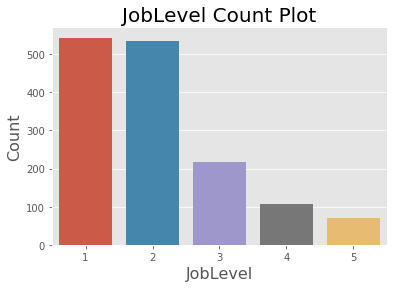

In [28]:
#Count Plot
sns.countplot(df1.JobLevel)
plt.title('JobLevel Count Plot', fontsize=20)      
plt.xlabel('JobLevel', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

# Largest population of Employess is between Joblevel 1 and 2

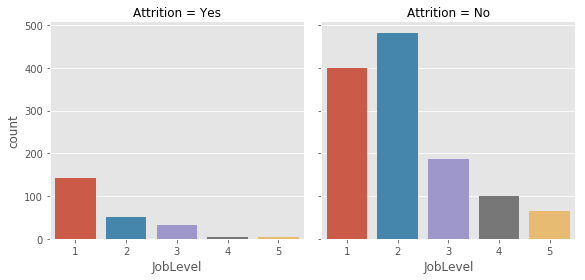

In [29]:

sns.factorplot(x="JobLevel", col="Attrition", 
                   data=df1,
                   kind="count")

# Maximum attrition is from Job level 1 .


   JobLevel  Num_Attrition
0         1       0.263352
1         2       0.097378
2         3       0.146789
3         4       0.047170
4         5       0.072464


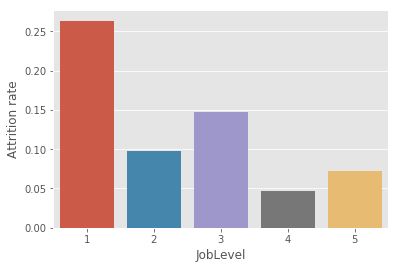

In [30]:
attrition_perc = df1[["JobLevel", "Num_Attrition"]].groupby(['JobLevel'], as_index = False).mean()
sns.barplot(x='JobLevel', y = 'Num_Attrition', data= attrition_perc).set(ylabel='Attrition rate')

print(attrition_perc)

# Maximum attrition rate is for Job level 1 at 26.33% .
# Minimum attrition rate is for Job level 4 at 04.71% .

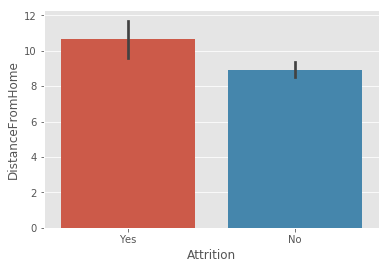

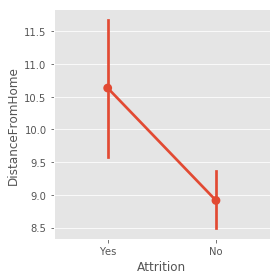

In [31]:
# BarPlot & FactorPlot

sns.barplot(x = 'Attrition', y = 'DistanceFromHome', data = df1)

sns.factorplot( y="DistanceFromHome", x="Attrition", data=df1)


# People are more likely to quit When 'DistanceFromHome' is greater than 9.


In [32]:
d={'Yes':1,'No':0}

df1['Num_OverTime']=df1['OverTime'].map(d)

df1['Num_OverTime'].head()

0    1
1    0
2    1
3    1
4    0
Name: Num_OverTime, dtype: int64

In [33]:
df1.loc[df1.TrainingTimesLastYear<2,'Cat_TrainingTimesLastYear']= '0To1'
df1.loc[(df1.TrainingTimesLastYear>1)|(df1.TrainingTimesLastYear<4),'Cat_TrainingTimesLastYear']= '2To3'
df1.loc[df1.TrainingTimesLastYear>3,'Cat_TrainingTimesLastYear']= '3+' 

df1['Cat_TrainingTimesLastYear'].head()

0    2To3
1    2To3
2    2To3
3    2To3
4    2To3
Name: Cat_TrainingTimesLastYear, dtype: object

In [34]:
convert=['StockOptionLevel','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction', 
        'WorkLifeBalance' ,'JobLevel','Num_OverTime' ]

for col in convert:
    df1[col]=df1[col].astype('category')

In [35]:
import numpy

categorical = df1.select_dtypes(exclude=[numpy.number]).columns.tolist()
print(categorical)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'Cat_Age', 'Cat_MonthlyIncome', 'CmpYrInterval', 'RateLvl', 'PromoYrLvl', 'Cat_Education', 'Cat_EnvironmentSatisfaction', 'Cat_JobInvolvement', 'Cat_JobSatisfaction', 'Cat_PerformanceRating', 'Cat_RelationshipSatisfaction', 'Cat_WorkLifeBalance', 'Num_OverTime', 'Cat_TrainingTimesLastYear']


In [36]:
numerical = df1.columns.difference(categorical)

print(numerical)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Num_Attrition', 'PercentSalaryHike', 'PerformanceRating',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [37]:
df1.shape

(1470, 47)

In [38]:
Y=df1['Num_Attrition']

print(Y.shape)

print(Y.head())

del df1['Num_Attrition']

(1470,)
0    1
1    0
2    1
3    0
4    0
Name: Num_Attrition, dtype: int64


In [39]:
To_Delete=['Age','Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating',
           'RelationshipSatisfaction','WorkLifeBalance','MonthlyIncome','YearsAtCompany','DailyRate','YearsSinceLastPromotion',
          'PromoYrLvl','Attrition','OverTime','TrainingTimesLastYear']

for col in To_Delete:
    del df1[col]

In [40]:
#for col in categorical:
#df1['Cat_PerformanceRating']=df1['Cat_PerformanceRating'].astype('int64')    

In [41]:
categorical = df1.select_dtypes(exclude=[numpy.number]).columns.tolist()
print(categorical)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel', 'Cat_Age', 'Cat_MonthlyIncome', 'CmpYrInterval', 'RateLvl', 'Cat_Education', 'Cat_EnvironmentSatisfaction', 'Cat_JobInvolvement', 'Cat_JobSatisfaction', 'Cat_PerformanceRating', 'Cat_RelationshipSatisfaction', 'Cat_WorkLifeBalance', 'Num_OverTime', 'Cat_TrainingTimesLastYear']


In [42]:
numerical = df1.columns.difference(categorical)

print(numerical)


Index(['DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


In [43]:
import copy

df2=copy.deepcopy(df1)

In [44]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


#Transforming Categorical columns Numeric 
for col in categorical:
    df2[col]=le.fit_transform(df2[col])


In [45]:
df2[categorical].head()

,BusinessTravel,Department,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,Cat_Age,Cat_MonthlyIncome,...,RateLvl,Cat_Education,Cat_EnvironmentSatisfaction,Cat_JobInvolvement,Cat_JobSatisfaction,Cat_PerformanceRating,Cat_RelationshipSatisfaction,Cat_WorkLifeBalance,Num_OverTime,Cat_TrainingTimesLastYear
0,2,2,1,0,1,7,2,0,1,2,...,3,2,2,0,3,0,1,0,1,0
1,1,1,1,1,1,6,1,1,1,1,...,0,1,0,2,2,1,3,2,0,0
2,2,1,4,1,0,2,2,0,0,1,...,4,2,3,2,0,0,2,2,1,0
3,1,1,1,0,0,6,1,0,0,1,...,4,4,3,0,0,0,0,2,1,0
4,2,1,3,1,0,2,1,1,3,1,...,1,1,1,0,2,0,3,2,0,0


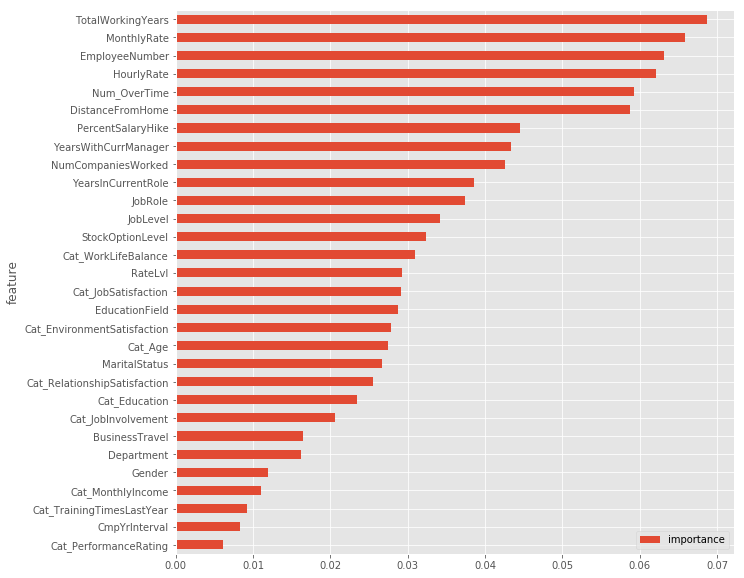

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=300, criterion='gini')
clf = clf.fit(df2, Y)

features = pd.DataFrame()
features['feature'] = df2.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 10))

In [47]:
# Choosing first 23 most important Attributes to train our model

df5=features.sort_values(by='importance',ascending=False)

To_Use=df5.index.tolist()[:26]

In [48]:
X=df1[To_Use]

X.head()

,TotalWorkingYears,MonthlyRate,EmployeeNumber,HourlyRate,Num_OverTime,DistanceFromHome,PercentSalaryHike,YearsWithCurrManager,NumCompaniesWorked,YearsInCurrentRole,...,EducationField,Cat_EnvironmentSatisfaction,Cat_Age,MaritalStatus,Cat_RelationshipSatisfaction,Cat_Education,Cat_JobInvolvement,BusinessTravel,Department,Gender
0,8,19479,1,94,1,1,11,5,8,4,...,Life Sciences,Medium,Senior,Single,Low,College,High,Travel_Rarely,Sales,Female
1,10,24907,2,61,0,8,23,7,1,7,...,Life Sciences,High,Senior,Married,Very High,Below College,Medium,Travel_Frequently,Research & Development,Male
2,7,2396,4,92,1,2,15,0,6,0,...,Other,Very High,Middle,Single,Medium,College,Medium,Travel_Rarely,Research & Development,Male
3,8,23159,5,56,1,3,11,0,1,7,...,Life Sciences,Very High,Middle,Married,High,Master,High,Travel_Frequently,Research & Development,Female
4,6,16632,7,40,0,2,12,2,9,2,...,Medical,Low,Young,Married,Very High,Below College,High,Travel_Rarely,Research & Development,Male


In [49]:
Nunique = X.nunique()
Nunique = Nunique.sort_values()
Nunique



Gender                             2
Num_OverTime                       2
BusinessTravel                     3
MaritalStatus                      3
Department                         3
Cat_JobInvolvement                 4
Cat_RelationshipSatisfaction       4
Cat_Age                            4
Cat_EnvironmentSatisfaction        4
Cat_JobSatisfaction                4
Cat_WorkLifeBalance                4
StockOptionLevel                   4
RateLvl                            5
Cat_Education                      5
JobLevel                           5
EducationField                     6
JobRole                            9
NumCompaniesWorked                10
PercentSalaryHike                 15
YearsWithCurrManager              18
YearsInCurrentRole                19
DistanceFromHome                  29
TotalWorkingYears                 40
HourlyRate                        71
MonthlyRate                     1427
EmployeeNumber                  1470
dtype: int64

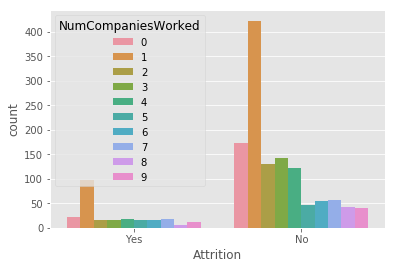

In [50]:
df7=pd.read_csv(r'C:\Users\HP\Desktop\Employee Churn\WA_Fn-UseC_-HR-Employee-Attrition.csv','r',encoding='utf8',delimiter=',')
sns.countplot(x='Attrition', hue='NumCompaniesWorked', data=df7)
plt.show()

   NumCompaniesWorked  Num_Attrition
0                   0       0.116751
1                   1       0.188100
2                   2       0.109589
3                   3       0.100629
4                   4       0.122302
5                   5       0.253968
6                   6       0.228571
7                   7       0.229730
8                   8       0.122449
9                   9       0.230769


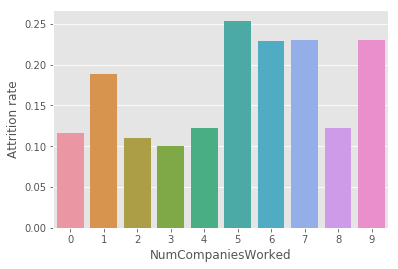

In [51]:
d={'Yes':1,'No':0}

df7['Num_Attrition']=df7['Attrition'].map(d)


attrition_perc = df7[["NumCompaniesWorked", "Num_Attrition"]].groupby(['NumCompaniesWorked'], as_index = False).mean()
sns.barplot(x='NumCompaniesWorked', y = 'Num_Attrition', data= attrition_perc).set(ylabel='Attrition rate')

print(attrition_perc)


In [52]:
for col in ['JobRole','Cat_WorkLifeBalance','Cat_JobSatisfaction','RateLvl','EducationField','MaritalStatus',
            'Cat_EnvironmentSatisfaction', 'Cat_Age','Cat_RelationshipSatisfaction','Cat_Education','Cat_JobInvolvement',
            'BusinessTravel','Department','Gender'
           ]:
    X[col]=le.fit_transform(X[col])


In [53]:
X.head()

,TotalWorkingYears,MonthlyRate,EmployeeNumber,HourlyRate,Num_OverTime,DistanceFromHome,PercentSalaryHike,YearsWithCurrManager,NumCompaniesWorked,YearsInCurrentRole,...,EducationField,Cat_EnvironmentSatisfaction,Cat_Age,MaritalStatus,Cat_RelationshipSatisfaction,Cat_Education,Cat_JobInvolvement,BusinessTravel,Department,Gender
0,8,19479,1,94,1,1,11,5,8,4,...,1,2,1,2,1,2,0,2,2,0
1,10,24907,2,61,0,8,23,7,1,7,...,1,0,1,1,3,1,2,1,1,1
2,7,2396,4,92,1,2,15,0,6,0,...,4,3,0,2,2,2,2,2,1,1
3,8,23159,5,56,1,3,11,0,1,7,...,1,3,0,1,0,4,0,1,1,0
4,6,16632,7,40,0,2,12,2,9,2,...,3,1,3,1,3,1,0,2,1,1


In [54]:
from sklearn import preprocessing

Cont_Var=['TotalWorkingYears','MonthlyRate','HourlyRate','DistanceFromHome','PercentSalaryHike','YearsWithCurrManager',
          'NumCompaniesWorked',
         ]
scaler=preprocessing.StandardScaler()

for col in Cont_Var:
    X[col]=scaler.fit_transform(X[col].values.reshape(-1, 1))

In [55]:
for col in ['Num_OverTime', 'JobLevel', 'StockOptionLevel']:
    X[col]=X[col].astype('int64')

In [56]:
X.head()

,TotalWorkingYears,MonthlyRate,EmployeeNumber,HourlyRate,Num_OverTime,DistanceFromHome,PercentSalaryHike,YearsWithCurrManager,NumCompaniesWorked,YearsInCurrentRole,...,EducationField,Cat_EnvironmentSatisfaction,Cat_Age,MaritalStatus,Cat_RelationshipSatisfaction,Cat_Education,Cat_JobInvolvement,BusinessTravel,Department,Gender
0,-0.421642,0.726020,1,1.383138,1,-1.010909,-1.150554,0.245834,2.125136,4,...,1,2,1,2,1,2,0,2,2,0
1,-0.164511,1.488876,2,-0.240677,0,-0.147150,2.129306,0.806541,-0.678049,7,...,1,0,1,1,3,1,2,1,1,1
2,-0.550208,-1.674841,4,1.284725,1,-0.887515,-0.057267,-1.155935,1.324226,0,...,4,3,0,2,2,2,2,2,1,1
3,-0.421642,1.243211,5,-0.486709,1,-0.764121,-1.150554,-1.155935,-0.678049,7,...,1,3,0,1,0,4,0,1,1,0
4,-0.678774,0.325900,7,-1.274014,0,-0.887515,-0.877232,-0.595227,2.525591,2,...,3,1,3,1,3,1,0,2,1,1


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=Y)

In [ ]:
'''
from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=0)
smote_X_train, smote_Y_train = oversampler.fit_sample(X_train,Y_train)


from collections import Counter

print('Unsampled dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(smote_Y_train)))

'''

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train) 
lr.score(X_test, Y_test)

0.8662131519274376

In [59]:
from sklearn.metrics import log_loss
clf_lr = LogisticRegression()
clf_lr.fit(X_train, Y_train)
clf_probs = clf_lr.predict_proba(X_test)
score = log_loss(Y_test, clf_probs)
print(score)

0.36788223388169805


In [60]:
from sklearn.calibration import CalibratedClassifierCV

sig_clf = CalibratedClassifierCV(clf_lr, method="isotonic", cv=7)
sig_clf.fit(X_train, Y_train)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(Y_test, sig_clf_probs)
print(sig_score)

0.3585806994220138


In [61]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test.values, sig_clf_probs[:,1])

0.7825466311381803

In [62]:
from catboost import CatBoostClassifier

model = model = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

# Fit model
model.fit(X_train, Y_train)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test)

0:	learn: 0.4106759	total: 107ms	remaining: 107ms
1:	learn: 0.3757315	total: 119ms	remaining: 0us


In [63]:
sig_score = log_loss(Y_test, preds_proba)
print(sig_score)

score = accuracy_score(Y_test, preds_class)
print(score)

0.37238037012414005
0.8458049886621315


In [81]:
# LinearSVC with no calibration
from sklearn.svm import LinearSVC


clf = LinearSVC(penalty='l2',dual=False,C=.40,max_iter=1500)

clf.fit(X_train, Y_train)
clf_probs = clf.predict(X_test)
score = accuracy_score(Y_test, clf_probs)
print(score)

0.8662131519274376


In [82]:
# LinearSVC with sigmoid calibration
# Base estimator and callibration should be done on different data points.
from sklearn.calibration import CalibratedClassifierCV


sig_clf = CalibratedClassifierCV(clf, method="isotonic", cv=10)
sig_clf.fit(X_train, Y_train)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(Y_test, sig_clf_probs)
print(sig_score)

0.3618138318227318


In [ ]:
import joblib
#Save model for future use
joblib.dump(clf, 'SVC_EC.pkl')
# To load:
#clf = joblib.load('SVC_EC.pkl')

In [58]:
# SVC with no calibration
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)
clf_probs = clf.predict(X_test)
score = accuracy_score(Y_test, clf_probs)
print(score)

0.854875283446712


In [63]:
import joblib
#Save model for future use
joblib.dump(sig_clf, 'sig_SVC_EC.pkl')
# To load:
#sig_clf = joblib.load('sig_SVC_EC.pkl')

['sig_SVC_EC.pkl']

In [62]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

sig_clf = CalibratedClassifierCV(clf, method="isotonic", cv=8)
sig_clf.fit(X_train, Y_train)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(Y_test, sig_clf_probs)
print(sig_score)

0.3674987579168103


In [64]:
from xgboost import XGBClassifier 

clf = XGBClassifier()

clf.fit(X_train, Y_train)
clf_probs = clf.predict_proba(X_test)
score = log_loss(Y_test, clf_probs)
print(score)

0.34622152517454663


In [65]:
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv=10)
sig_clf.fit(X_train, Y_train)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(Y_test, sig_clf_probs)
print(sig_score)

0.3319780699892059


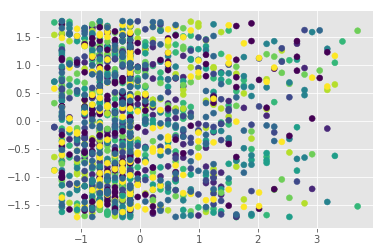

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=10, random_state=5).fit_predict(X)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y_pred)

In [108]:
# The gap statistic

import random

def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))
 
def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(list(X), K)
    mu = random.sample(list(X), K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def Wk(mu, clusters):
    K = len(mu)
    return sum([np.linalg.norm(mu[i]-c)**2/(2*len(c)) \
               for i in range(K) for c in clusters[i]])

def bounding_box(X):
    xmin, xmax = min(X,key=lambda a:a[0])[0], max(X,key=lambda a:a[0])[0]
    ymin, ymax = min(X,key=lambda a:a[1])[1], max(X,key=lambda a:a[1])[1]
    return (xmin,xmax), (ymin,ymax)
 
def gap_statistic(X):
    (xmin,xmax), (ymin,ymax) = bounding_box(X)
    # Dispersion for real distribution
    ks = range(1,10)
    Wks = numpy.zeros(len(ks))
    Wkbs = numpy.zeros(len(ks))
    sk = numpy.zeros(len(ks))
    for indk, k in enumerate(ks):
        mu, clusters = find_centers(X,k)
        Wks[indk] = np.log(Wk(mu, clusters))
        # Create B reference datasets
        B = 10
        BWkbs = numpy.zeros(B)
        for i in range(B):
            Xb = []
            for n in range(len(X)):
                Xb.append([random.uniform(xmin,xmax),
                          random.uniform(ymin,ymax)])
            Xb = np.array(Xb)
            mu, clusters = find_centers(Xb,k)
            BWkbs[i] = np.log(Wk(mu, clusters))
        Wkbs[indk] = sum(BWkbs)/B
        sk[indk] = np.sqrt(sum((BWkbs-Wkbs[indk])**2)/B)
    sk = sk*np.sqrt(1+1/B)
    return(ks, Wks, Wkbs, sk)

ks, logWks, logWkbs, sk = gap_statistic(X.values)

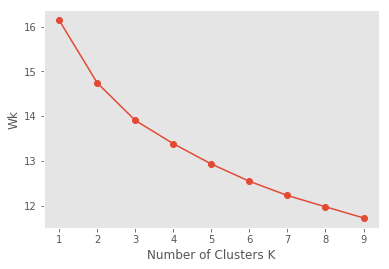

In [68]:
plt.plot(ks,logWks,'-o' )
plt.xlabel('Number of Clusters K')
plt.ylabel('Wk')
plt.grid()
plt.show()

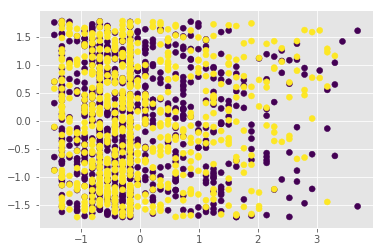

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=2, random_state=5).fit_predict(X)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y_pred)

In [59]:
X1=copy.deepcopy(X)

X1['Type']= y_pred.tolist()

In [60]:
X1.head()

,TotalWorkingYears,EmployeeNumber,MonthlyRate,HourlyRate,DistanceFromHome,Num_OverTime,PercentSalaryHike,YearsWithCurrManager,NumCompaniesWorked,JobRole,...,Cat_EnvironmentSatisfaction,Cat_RelationshipSatisfaction,MaritalStatus,Cat_Age,Cat_Education,Cat_JobInvolvement,BusinessTravel,Department,Gender,Type
0,-0.421642,1,0.726020,1.383138,-1.010909,1,-1.150554,0.245834,2.125136,7,...,2,1,2,1,2,0,2,2,0,0
1,-0.164511,2,1.488876,-0.240677,-0.147150,0,2.129306,0.806541,-0.678049,6,...,0,3,1,1,1,2,1,1,1,0
2,-0.550208,4,-1.674841,1.284725,-0.887515,1,-0.057267,-1.155935,1.324226,2,...,3,2,2,0,2,2,2,1,1,0
3,-0.421642,5,1.243211,-0.486709,-0.764121,1,-1.150554,-1.155935,-0.678049,6,...,3,0,1,0,4,0,1,1,0,0
4,-0.678774,7,0.325900,-1.274014,-0.887515,0,-0.877232,-0.595227,2.525591,2,...,1,3,1,3,1,0,2,1,1,0


In [60]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=Y)

In [62]:
from sklearn.svm import SVC

random_search_SVC=SVC(probability=True,class_weight='balanced')

#random_search_SVC.fit(X, Y)

if(1):
    
    param_dist = {

                  "C": sp_randint(1, 20),
                  "gamma":[0.001, 0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5, 1.0] ,
                  "kernel":['poly','rbf','sigmoid'],
                  "degree":sp_randint(3, 20)
                 }




    n_iter_search = 20
    cross_validation = StratifiedKFold(Y_train)

    random_search_SVC = RandomizedSearchCV(random_search_SVC, param_distributions=param_dist,
                                       n_iter=n_iter_search,cv=7)


    random_search_SVC.fit(X1_train, Y1_train)


In [63]:
from sklearn.metrics import log_loss

clf_probs = random_search_SVC.predict_proba(X1_test)
score = log_loss(Y1_test, clf_probs)
print(score)

0.4413270374107807


In [ ]:
sig_clf = CalibratedClassifierCV(random_search_SVC, method="isotonic", cv=7)
sig_clf.fit(X1_train, Y1_train)
sig_clf_probs = sig_clf.predict_proba(X1_test)
sig_score = log_loss(Y1_test, sig_clf_probs)
print(sig_score)

In [61]:
from sklearn.cross_validation import StratifiedKFold
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
              "max_features": sp_randint(6, 16),
              "min_samples_split": sp_randint(3, 10),
              "min_samples_leaf": sp_randint(2, 10),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": sp_randint(50, 200),
              "max_depth" : sp_randint(6, 11)
             }

clf = RandomForestClassifier(class_weight='balanced')
n_iter_search = 20
cross_validation = StratifiedKFold(Y1_train)

random_search_RFC = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=7)


random_search_RFC.fit(X1_train, Y1_train)

RandomizedSearchCV(cv=7, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000275E6CEEF98>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000275E6CEE400>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000275E6C03...5E6C03240>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000275E6C03C50>},
          pre_dispa

In [62]:
clf_probs = random_search_RFC.predict_proba(X1_test)
score = log_loss(Y1_test, clf_probs)
print(score)

0.38071642580424003


In [65]:
sig_clf = CalibratedClassifierCV(random_search_RFC, method="sigmoid", cv=10)
sig_clf.fit(X1_train, Y1_train)
sig_clf_probs = sig_clf.predict_proba(X1_test)
sig_score = log_loss(Y1_test, sig_clf_probs)
print(sig_score)

0.34626104825209425


In [64]:
import joblib
#Save model for future use
joblib.dump(sig_clf, 'iso_RF_EC.pkl')
# To load:
#sig_clf = joblib.load('iso_RF_EC.pkl')

['iso_RF_EC.pkl']

In [66]:
from xgboost import XGBClassifier 

clf = XGBClassifier()

clf.fit(X1_train, Y1_train)
clf_probs = clf.predict_proba(X1_test)
score = log_loss(Y1_test, clf_probs)
print(score)

0.34622152517454663


In [67]:
sig_clf = CalibratedClassifierCV(clf, method="isotonic", cv=10)
sig_clf.fit(X1_train, Y1_train)
sig_clf_probs = sig_clf.predict_proba(X1_test)
sig_score = log_loss(Y1_test, sig_clf_probs)
print(sig_score)

0.3291010467579353


In [68]:
Y_pred = sig_clf.predict(X1_test)



from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8820861678004536

In [69]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test.values, sig_clf_probs[:,1])

0.8082413399314807

In [70]:
from sklearn.metrics import classification_report
target_names = ['Attrition-No', 'Attrition-Yes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

               precision    recall  f1-score   support

 Attrition-No       0.89      0.98      0.93       370
Attrition-Yes       0.76      0.39      0.52        71

  avg / total       0.87      0.88      0.87       441



In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

array([[361,   9],
       [ 43,  28]], dtype=int64)

In [109]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(kind = "regular")

X_sm, y_sm = smote.fit_sample(X1_train, Y1_train)



In [98]:
clfSmote = XGBClassifier()

clfSmote.fit(X_sm, y_sm)
clf_probs = clfSmote.predict_proba(X1_test.values)
score = log_loss(Y1_test, clf_probs)
print('Log Loss-->' ,score)

Y_pred = clfSmote.predict(X1_test.values)





from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test, Y_pred)
print('accuracy_score-->' ,acc)



Log Loss--> 0.317199451091769
accuracy_score--> 0.8820861678004536


In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test.values, clf_probs[:,1])

0.8327369623144271

In [93]:
from sklearn.metrics import classification_report
target_names = ['Attrition-No', 'Attrition-Yes']
print(classification_report(Y_test, Y_pred, target_names=target_names))

               precision    recall  f1-score   support

 Attrition-No       0.89      0.98      0.93       370
Attrition-Yes       0.77      0.38      0.51        71

  avg / total       0.87      0.88      0.86       441



In [99]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

array([[362,   8],
       [ 44,  27]], dtype=int64)